In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('female_data.csv')

/tmp/ipykernel_13523/2722927318.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('female_data.csv')


In [3]:
x1 = data['runs_scored'].values
x2 = data['wickets_taken'].values
y  = data['fantasy_score_total'].values


poly = np.column_stack((
    np.ones(len(x1)),  
    x1,                
    x2,                 
    x1**2,
    x1 * x2,       
    x2**2 
))

In [4]:
np.random.seed(50)  
indices = np.arange(len(y))
np.random.shuffle(indices)

split_ratio = 0.8
split = int(len(y) * split_ratio)
train = indices[:split]
test = indices[split:]
X_train, X_test = poly[train], poly[test]
y_train, y_test = y[train], y[test]

In [5]:
XtX = X_train.T @ X_train
XtX_inv = np.linalg.inv(XtX)
XtY = X_train.T @ y_train
weights = XtX_inv @ XtY

In [6]:
# 5. Evaluate model
train_pred = X_train @ weights
test_pred = X_test @ weights

train_mse = np.mean((train_pred - y_train)**2)
test_mse = np.mean((test_pred - y_test)**2)
mse_train = np.mean((y_train - train_pred) ** 2)
mse_test = np.mean((y_test - test_pred) ** 2)


print("Weights:", weights)
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Weights: [ 5.85797154e+00  1.25332122e+00  3.18918774e+01  2.62849909e-04
 -4.22282096e-02 -3.11273244e-01]
Train MSE: 70.29466736255337
Test MSE: 69.12949506160481


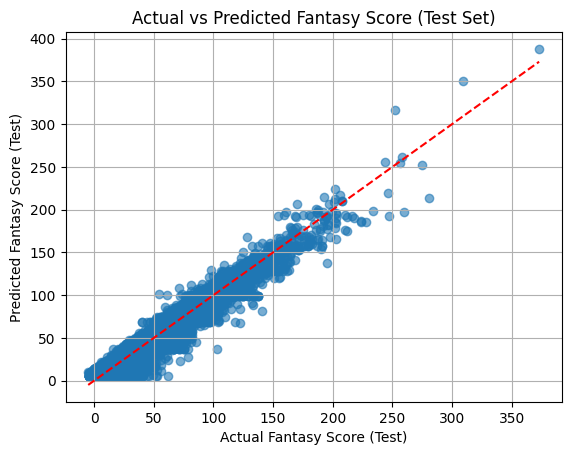

In [7]:

plt.scatter(y_test, test_pred, alpha=0.6)
plt.xlabel("Actual Fantasy Score (Test)")
plt.ylabel("Predicted Fantasy Score (Test)")
plt.title("Actual vs Predicted Fantasy Score (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()